# <center>Centro Universitário Facens<br/></center>
<br/>
<font size="4"><center><b>Disciplina: Processamento de imagens</b></center></font>
  
<font size="3"><center>Prof. Renato M. Silva</center></font>
<br/>
<br/>

## <center>Avaliação Continuada 2 (AC2)</center>

----
### <center>Nome e RA dos componentes do grupo</center>

    
| Nome     |      RA      | 
|:-        |:-------------:|
|Felipe Galdino dos Santos          |171038              | 
|          |              | 
|          |              | 
|          |              | 
    

----
### Instruções
**1**. Siga boas práticas de programação:
- dar nomes intuitivos para as variáveis
- dar nomes intuitivos para as funções

**2**. O trabalho pode ser feito em grupos de até 3 pessoas. Porém, não é permitido que o grupo tenha pessoas de uma turma diferente da sua.  Apenas uma pessoa do grupo deve submeter o trabalho. Você deve submeter apenas o arquivo .ipynb.

**3**. Em todos os exercícios, as imagens finais solicitadas devem estar no formato **uint8**.

**4**. Não é permitido usar nenhuma outra biblioteca de processamento de imagens além da OpenCV.

**5**. Cuidado com plágio. Se for detectado plágio entre grupos, a punição será dada para todos os componentes dos grupos envolvidos.

**6**. Antes de submeter o notebook, certifique-se que não há erros de código. Uma forma de se certificar disso é usar a opção **"Reiniciar Kernel e executar todas as células"** do Jupyter ou a opção **"Reiniciar e executar tudo"** do Google Colab. 

In [2]:
# importações
import numpy as np
import cv2  
import matplotlib.pyplot as plt

----
## Exercicio 1

 - a) Crie uma matriz usando a biblioteca numpy.
 - b) Transforme essa matriz em uma imagem que corresponda a bandeira da Malásia, apresentada abaixo. 
 - c) Plote a imagem resultante.
 - d) Salve a imagem resultante na pasta **figsResultado** com o nome **ex01.png**

 <img src="figsNotebook/malasia_flag.png" width="255" height="128" />
  

 
Para gerar a bandeira da Malásia, você poderá fazer apenas as seguintes operações:

- operações morfológicas nos símbolos contidos na imagem **malasia_flagSymbols.png** disponível na pasta **figs** para remover os pontos brancos;
- operações aritméticas entre a matriz e os símbolos contidos na imagem **malasia_flagSymbols.png** disponível na pasta **figs**; 
- operações matriciais, tanto para gerar e transformar cores, quanto para gerar os retângulos que fazem parte da bandeira.

Obs: as únicas funções prontas da biblioteca OpenCV que podem ser usadas neste exercícios são as que executam operações morfológicas.

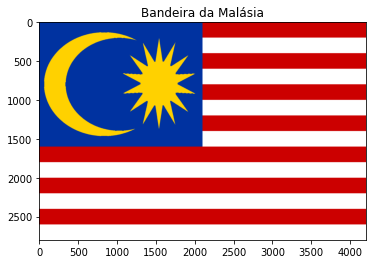

In [14]:
##### Resolva o exercício aqui

# copyPixels copia todos os pixels da cor color de src para dest, iniciando nas coordenadas startX e startY de dest
def copyPixels(dest, src, startY, startX, color):
  for y in range(src.shape[0]):
    for x in range(src.shape[1]):
      if np.array_equal(src[y][x], color):
        dest[startY+y][startX+x] = src[y][x]



QUANT_LISTRAS = 14
flag_height=200 * QUANT_LISTRAS # precisa ser multiplo de 14, pois sao 14 listras na bandeira
flag_length = int(1.5 * flag_height)
bandeira_malasia = np.zeros([flag_height,flag_length,3], dtype=np.uint8)
redPixel = [204,0,0]
whitePixel = [255,255,255]
bluePixel = [0,50,160]
yellowPixel = [255,209,0]

# gera as listras vermelho e branco da bandeira
for i in range(14):
  bandeira_malasia[i*int(flag_height/14):(i+1)*int(flag_height/14),:] = redPixel if i%2==0 else whitePixel


# cria o quadrado azul da bandeira
bandeira_malasia[0:8*int(flag_height/14),0:int(flag_length/2)] = bluePixel

# abre a imagem setando o oparâmetro IMREAD_UNCHANGED para que
# ela seja aberta no formato BGRA: um formato igual ao BGR, mas que possui também um canal alpha (a parte transparente)
imgBGRA = cv2.imread('figs/malasia_flagSymbols.png', cv2.IMREAD_UNCHANGED)

# converte a imagem de BGRA para RGB
imgRGB = cv2.cvtColor(imgBGRA, cv2.COLOR_BGRA2RGB)

# os locais transparentes da imagem BGRA possuem valores 0 no canal alpha (índice 3)
# o código abaixo captura os pixels transparentes da imagem BGRA e transforma os respectivos pixels
# da imagem RGB para vermelho
imgRGB[ imgBGRA[:,:,3] == 0 ] = [255,255,255]


# converte a imagem para escala de cinza a fim de aplicar a limiarização
imgGray = cv2.cvtColor(imgRGB, cv2.COLOR_RGB2GRAY)

# aplica a limiarização
ret, thresh = cv2.threshold(imgGray, 127, 255, cv2.THRESH_BINARY)

# aplica o processo de abertura da imagem para remover os pontos brancos
kernel = np.ones((5,5), np.uint8)
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel)


# converte o resultado da abertura em  RGBA
opening = cv2.cvtColor(opening, cv2.COLOR_GRAY2RGBA)
# zera o alpha dos pixeis do fundo para voltar a ter transparência
opening[ opening[:,:,0] == 255] = [0,0,0,0]

imgCompleta = opening.copy()
# define para amarelo os pixels que possuem alpha igual à 255
imgCompleta[ imgCompleta[:,:,3] == 255 ] = yellowPixel + [255]

# separa as figuras
lua = imgCompleta[:630,:]
sol = imgCompleta[630:,:]

# cria uma roi com o tamanho certo do quadrado azul da bandeira
roi = np.zeros([8*int(flag_height/14),int(flag_length/2),4], dtype=np.uint8)
roi[:,:] = bluePixel + [255]


# reescala as figuras para ficarem do tamanho adequado para a roi
scaleLua = 2.4
scaleSol = 2.15
lua = cv2.resize(lua, (int(lua.shape[0] * scaleLua), int(lua.shape[1] * scaleLua)), interpolation=cv2.INTER_CUBIC)
sol = cv2.resize(sol, (int(sol.shape[0] * scaleSol), int(sol.shape[1] * scaleSol)), interpolation=cv2.INTER_CUBIC)

# copia os pixels amarelos para a roi
copyPixels(roi, lua, 80, 0, yellowPixel+[255])
copyPixels(roi, sol, 150, 970, yellowPixel+[255])

# copia a roi nova (quadrado azul) para a bandeira
bandeira_malasia[0:8*int(flag_height/14),0:int(flag_length/2)] = roi[:,:,0:3]


# converte a imagem de volta para BGR para poder ser salva
bandeira_malasia_bgr = cv2.cvtColor(bandeira_malasia, cv2.COLOR_RGB2BGR)
# salva a imagem na pasta figsResultado
cv2.imwrite('./figsResultado/ex01.png', bandeira_malasia_bgr)


plt.imshow(bandeira_malasia)
plt.title('Bandeira da Malásia')
plt.show()




----
## Exercício 2

Sabe-se que é possível reduzir o efeito de borramento de uma imagem por meio da operação de realce de contraste que irá gerar uma nova imagem onde cada pixel $g$ recebe o valor definido pela equação a seguir:

$$g = 
\begin{cases}
f \ominus b \text{, } & \text{ se } f - (f \ominus b) <  ( f \oplus b ) - f \\
f \oplus b\text{, } & \text{ caso contrário }
\end{cases}
$$

Na equação acima, $f \ominus b$ é o resultado da operação de erosão no pixel $f$ usando o elemento estruturante $b$. Por outro lado, $f \oplus b$ é o resultado da operação de dilatação no pixel $f$ usando o elemento estruturante $b$.

Implemente a operação de realce descrita acima e aplique na imagem **img/borramento.jpg**. Depois disso, plote a imagem resultante na tela e também salve na pasta **figsResultado** com o nome **ex02.png**

Obs: neste exercício só é permitido usar função pronta da biblioteca OpenCV para fazer as operações de erosão e dilatação. 

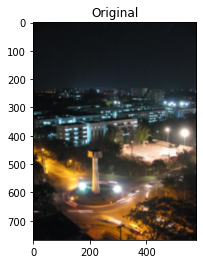

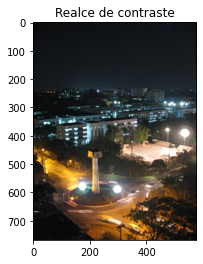

In [362]:
##### Resolva o exercício aqui
from statistics import mean

# utiliza a média dos canais RGB para retornar o menor
def menorMedia(pixelA, pixelB):
    return mean(pixelA) < mean(pixelB)
   
# utiliza a soma dos canais RGB para retornar o menor 
def menorSoma(pixelA:list, pixelB:list):
    return sum(pixelA) < sum(pixelB)

img = cv2.imread('figs/borramento.jpg')
imgRGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)


kernel = np.ones((5, 5), dtype=np.uint8)

erosao = cv2.erode(img, kernel, iterations=1)
dilatacao = cv2.dilate(img, kernel, iterations=1)


resultado = np.zeros((img.shape), dtype=np.uint8)
# aplica o realce em cada pixel
for y in range(img.shape[0]):
    for x in range(img.shape[1]):
        # fazendo testes, acredito que usando a soma dos canais RGB obteve um resultado melhor
        if menorSoma(img[y][x] - erosao[y][x], dilatacao[y][x] - img[y][x]):
            resultado[y][x] = erosao[y][x]
        else:
            resultado[y][x] = dilatacao[y][x]
            
            
# salva a imagem na pasta figsResultado
cv2.imwrite('./figsResultado/ex02.png', resultado)


plt.imshow(imgRGB)
plt.title('Original')
plt.show()

resultadoRGB = cv2.cvtColor(resultado, cv2.COLOR_BGR2RGB)
plt.imshow(resultadoRGB)
plt.title('Realce de contraste')
plt.show()


----
## Exercício 3

Sabe-se que é possível reduzir o efeito de borramento de uma imagem $f$ por meio de uma operação de realce de contraste que gera uma nova imagem $g$ resultante da combinação das transformadas **top-hat** e **bottom-hat**, conforme a seguinte equação:

$$g = 
f+TH(f)-BH(f)
$$

Na equação acima, $TH(f)$ é o resultado da transformada  **top-hat** na imagem $f$ e $BH(f)$ é o resultado da operação **bottom-hat** na imagem $f$.

Implemente a operação de realce descrita acima e aplique na imagem **img/borramento.jpg**. Depois disso, plote a imagem resultante na tela e também salve na pasta **figsResultado** com o nome **ex03.png**

Obs: neste exercício só é permitido usar função pronta da biblioteca OpenCV para fazer as operações de erosão e dilatação. 

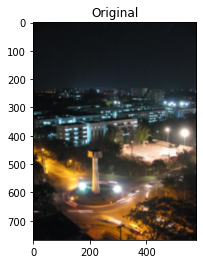

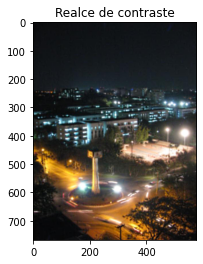

In [363]:
##### Resolva o exercício aqui

img = cv2.imread('figs/borramento.jpg')
imgRGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)


kernel = np.ones((5, 5), dtype=np.uint8)

# realiza erosão e dilatação da imagem
erosao = cv2.erode(img, kernel, iterations=1)
dilatacao = cv2.dilate(img, kernel, iterations=1)

# realiza abertura e fechamento da imagem, a partir dos resultados do passo anterior
abertura = cv2.dilate(erosao, kernel, iterations=1)
fechamento = cv2.erode(dilatacao, kernel, iterations=1)

# realiza o top hat e bottom hat da imagem, a partir dos resultados do passo anterior
tophat = cv2.subtract(img, abertura)
bottomhat = cv2.subtract(fechamento, img)

# soma o top hat e subtrai o bottom hat da imagem original para gerar o realce de contraste
resultado = cv2.add(img, tophat)
resultado = cv2.subtract(resultado, bottomhat)



# salva a imagem na pasta figsResultado
cv2.imwrite('./figsResultado/ex03.png', resultado)

plt.imshow(imgRGB)
plt.title('Original')
plt.show()

resultadoRGB = cv2.cvtColor(resultado, cv2.COLOR_BGR2RGB)
plt.imshow(resultadoRGB)
plt.title('Realce de contraste')
plt.show()

----
## Exercicio 4

Remova o ruído da imagem **facens1_ruido.png** usando operações morfológicas. O resultado mínimo esperado é apresentado na imagem a seguir. Depois disso, plote a imagem resultante na tela e também salve na pasta **figsResultado** com o nome **ex04.png**

<img src="figsNotebook/facens1_ruidoCorrigido.png" width="500"/>

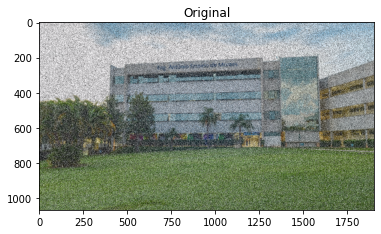

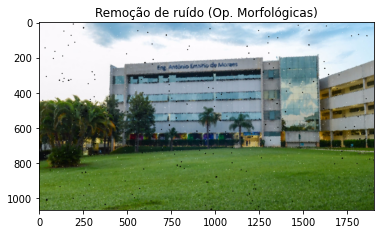

In [365]:

##### Resolva o exercício aqui

img = cv2.imread('figs/facens1_ruido.png')
imgRGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)


# com base em testes, esse foi o melhor elemento estruturante encontrado
elemEstrut = cv2.getStructuringElement(cv2.MORPH_CROSS,(3,3))

# realiza abertura da imagem, e em seguida o fechamento 3 vezes da abertura
# Obs: quantidade de abertura/fechamentos determinados empíricamente
abertura = cv2.morphologyEx(img, cv2.MORPH_OPEN, elemEstrut, iterations=1)
resultado = cv2.morphologyEx(abertura, cv2.MORPH_CLOSE, elemEstrut, iterations=3)


# salva a imagem na pasta figsResultado
cv2.imwrite('./figsResultado/ex04.png', resultado)

plt.imshow(imgRGB)
plt.title('Original')
plt.show()

resultadoRGB = cv2.cvtColor(resultado, cv2.COLOR_BGR2RGB)
plt.imshow(resultadoRGB)
plt.title('Remoção de ruído (Op. Morfológicas)')
plt.show()


----
## Exercicio 5

Remova o ruído da imagem **facens2_ruido.png** usando um ou mais filtros. O resultado mínimo esperado é apresentado na imagem a seguir. Depois disso, plote a imagem resultante na tela e também salve na pasta **figsResultado** com o nome **ex05.png**

<img src="figsNotebook/facens2_ruidoCorrigido.png" width="500"/>

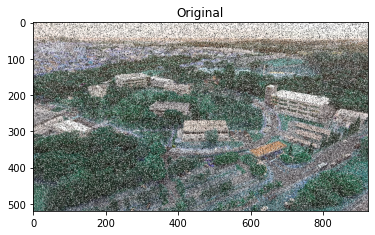

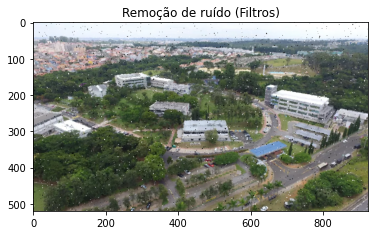

In [366]:
##### Resolva o exercício aqui

img = cv2.imread('figs/facens2_ruido.png')
imgRGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# aplica o filtro de mediana, considerado um dos melhores filtros para remover o ruído sal e pimenta
resultado = cv2.medianBlur(img,3)


# salva a imagem na pasta figsResultado
cv2.imwrite('./figsResultado/ex05.png', resultado)

plt.imshow(img)
plt.title('Original')
plt.show()

resultadoRGB = cv2.cvtColor(resultado, cv2.COLOR_BGR2RGB)
plt.imshow(resultadoRGB)
plt.title('Remoção de ruído (Filtros)')
plt.show()


----
## Exercicio 6

Faça uma função chamada **retornaCor** que deve receber uma imagem como entrada e retornar a cor predominante na imagem. Para isso, ela deve extrair o histograma de cada canal de cor da imagem de entrada e fazer uma análise deles para inferir a cor predominante. Teste a função criada nas imagens disponíveis no diretório **figs/objetos/** e imprima o nome de cada arquivo e a cor inferida.

objeto1.png: [  0   0 129]


C:\Users\felipe\AppData\Local\Temp\ipykernel_15176\1872458095.py:37: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 2, 1)


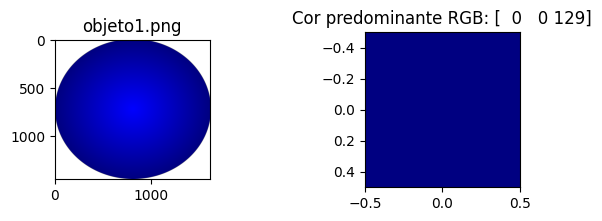

objeto2.png: [234  24  24]


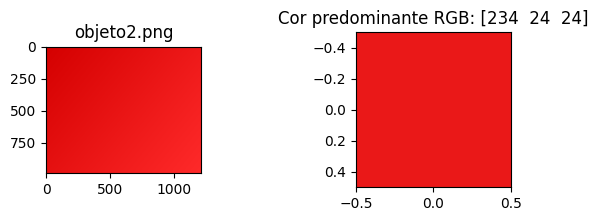

objeto3.png: [  0 128   0]


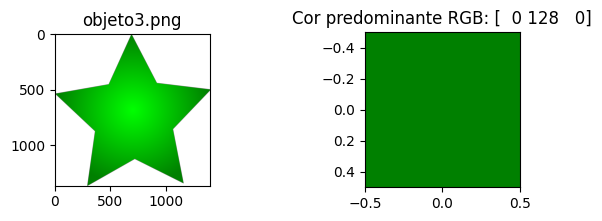

objeto4.png: [  0 185   0]


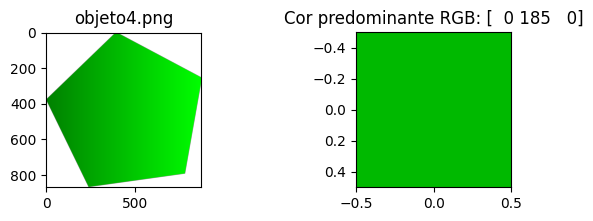

objeto5.png: [204   0   0]


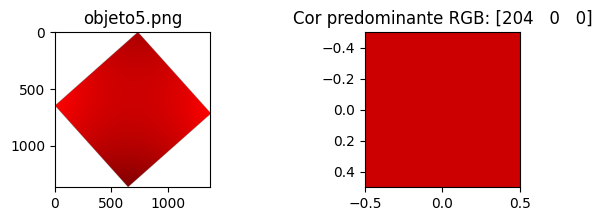

objeto6.png: [  0   0 255]


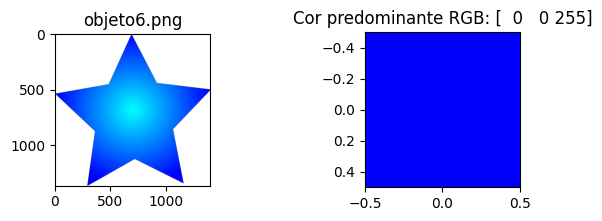

In [7]:
##### Resolva o exercício aqui
import os

# carrega todas as imagens de uma pasta, em ordem alfabética e retorna um array de imagens e outro com os respectivos nomes das imagens
def load_images_RGBA_from_folder(folder):
    images = []
    names = []
    for filename in sorted(os.listdir(folder)):
        img = cv2.imread(os.path.join(folder,filename), cv2.IMREAD_UNCHANGED) #BGRA
        if img is not None:
            img = cv2.cvtColor(img, cv2.COLOR_BGRA2RGBA)
            images.append(img)
            names.append(filename)
    return images, names

# retornaCor recebe uma imagem RGBA e retorna qual a cor RGB predominante na imagem
def retornaCor(img):
    cor_predominante = np.zeros(3, dtype=np.uint8) # array para armazenar a cor predominante da imagem
    # máscara usada para que o cálculo do histograma seja feito apenas onde não é transparente na imagem
    mask = np.zeros((img.shape[0], img.shape[1]), np.uint8)
    mask[ img[:,:,3] == 255] = 255
    for i in range(3):
        hist = cv2.calcHist([img],[i],mask,[256],[0,256])
        cor_predominante[i] = hist.argmax() # guarda o valor de cor que mais se repete no canal atual
    return cor_predominante

  
imgs, names = load_images_RGBA_from_folder('./figs/objetos/')

for i in range(len(imgs)):
    cor = retornaCor(imgs[i])
    
    print(f'{names[i]}: {cor}')
    plt.subplots(figsize=(6,6))
    plt.subplots_adjust(wspace=1)
    
    plt.subplot(1, 2, 1)
    plt.title(f'{names[i]}')
    plt.imshow(imgs[i])
    
    plt.subplot(1, 2, 2)
    plt.title(f'Cor predominante RGB: {cor}')
    plt.imshow([[cor]])
    
    plt.show()
    

----
## Exercicio 7

Aumentar um único tom de cinza em alguns pixels de uma imagem qualquer irá gerar uma alteração visualmente imperceptível. 

Considerando a afirmação acima, crie uma função chamada **criptografar** que deve receber duas imagens de entrada. Considere que a primeira imagem terá uma dimensão menor ou igual a da segunda imagem. Considere também que a primeira imagem contém um texto de um única cor e de tamanho arbitrário. A função deve retornar uma nova imagem que esconda a primeira imagem na segunda.

 - a limiarização pode ser usada para transformar os tons de cinza da primeira imagem para um tom de cinza desejado
 - uma operação aritmética pode ser usada para esconder a primeira imagem na segunda

Use a função acima para esconder a imagem **figs/mensagemSecreta.png** dentro da imagem **terra.jpg**, mostre a imagem resultante na tela e salve na pasta **figsResultado** com o nome **ex07_criptografada.png**

Crie uma função chamada **descriptografar** que deve receber duas imagem. A primeira delas é uma imagem que contém uma mensagem escondida. A segunda imagem é a original antes da operação de criptografia. A função deve retornar uma nova imagem que contenha a mensagem escondida (visível) extraída da primeira imagem fornecida como parâmetro da função. 
 - uma operação aritmética pode ser usada para extrair a imagem escondida
 - a limiarização pode ser usada para transformar os tons de cinza da mensagem escondida em um tom de cinza desejado

Use a função **descriptografar** para revelar a mensagem contida dentro da imagem retornada pela primeira função (**figsAlunos/ex07_criptografada.png**), mostre a imagem resultante na tela e salve na pasta **figsResultado** com o nome **ex07_descriptografada.png**.

Obs: as funções acima devem ser genéricas, ou seja, devem funcionar para quaisquer imagens passadas como entrada.

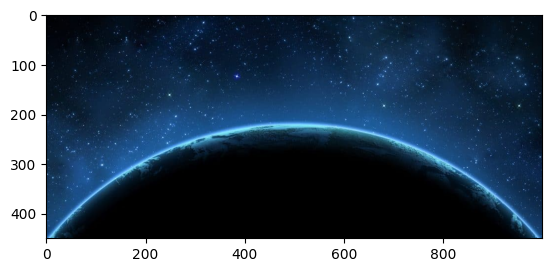

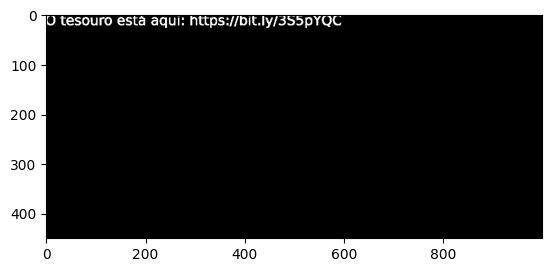

In [66]:
##### Resolva o exercício aqui

def criptografar(imgMsg, imgOriginal):
    imgMsg = cv2.cvtColor(imgMsg, cv2.COLOR_BGR2GRAY)
    # faz a limiarização da imagem para gerar uma imagem nova com valor 1 de cinza (no range de 0 a 255)
    _, threshMsg = cv2.threshold(imgMsg, 1, 1, cv2.THRESH_BINARY)
    threshMsgBGR = cv2.merge([threshMsg, threshMsg, threshMsg])
    # soma a imagem da mensagem com a imagem original, fazendo a criptografia
    msgCripto = imgOriginal[:threshMsg.shape[0], :threshMsg.shape[1]] + threshMsgBGR 

    imgCriptografada = imgOriginal.copy()
    imgCriptografada[:threshMsg.shape[0], :threshMsg.shape[1]] = msgCripto
    return imgCriptografada

def descriptografar(imgCriptografada, imgOriginal):
    # subtrai a imagem original da imagem criptografada, para obter as diferenças de pixels das imagens
    imgDecripto = imgCriptografada - imgOriginal
    # faz uma limiarização da imagem descriptografada para poder tornar visível a mensagem
    _, threshDecripto = cv2.threshold(imgDecripto, 0, 255, cv2.THRESH_BINARY)
    return threshDecripto


imgMensagem = cv2.imread('./figs/mensagemSecreta.png')
imgTerra = cv2.imread('./figs/terra.jpg')
# criptografa e salva a imagem reusltante
imgCripto = criptografar(imgMensagem, imgTerra)
cv2.imwrite('./figsResultado/ex07_criptografada.png', imgCripto)
# carrega a imagem gerada anteriormente e descriptografa
imgCripto = cv2.imread('./figsResultado/ex07_criptografada.png')
imgDecripto = descriptografar(imgCripto, imgTerra)
cv2.imwrite('./figsResultado/ex07_descriptografada.png', imgDecripto)

plt.imshow(cv2.cvtColor(imgTerra, cv2.COLOR_BGR2RGB))
plt.show()

plt.imshow(cv2.cvtColor(imgDecripto, cv2.COLOR_BGR2RGB))
plt.show()

----
## Exercicio 8

Crie uma função chamada **separar** que receba o endereço de dois diretório como parâmetro. Essa função deve criar duas subpastas no **segundo** diretório, chamadas **ex08_claro** e **ex08_escuro**. Ela deve identificar automaticamente se cada uma das imagens contidas no primeiro diretório é clara ou escura. 

 - Se a função identificar que a imagem é escura, ela deve fazer a equalização do histograma. Salve a imagem equalizada dentro da pasta **ex08_escuro**.
 
 - Se a função identificar que a imagem é clara, ela deve criar duas novas imagens com versões escurecidas: a primeira deve ser escurecida por meio de subtração, enquanto a segunda deve ser escurecida por meio de multiplicação. Depois disso, faça a equalização das duas imagens escurecidas. Salve as duas imagens escurecidas e suas versões equalizadas dentro da pasta **ex08_claro**.
 - Arredonde valores fracionários gerados pela operação aritmética
 - Trate os valores inválidos gerados pela operação aritmética com a técnica de saturação
 
Teste a função passando como parâmetro os endereços dos diretórios **figs/estrada/** e **figsResultado**, respectivamente.

Dica:
 - para identificar se a imagem é clara ou escura você pode usar informações do histograma

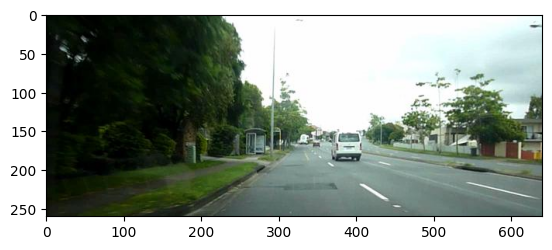

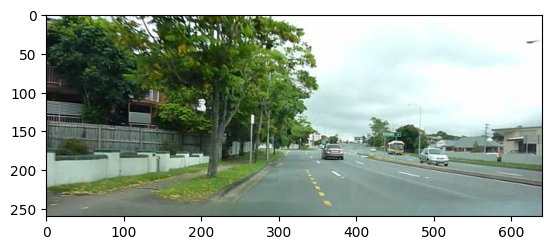

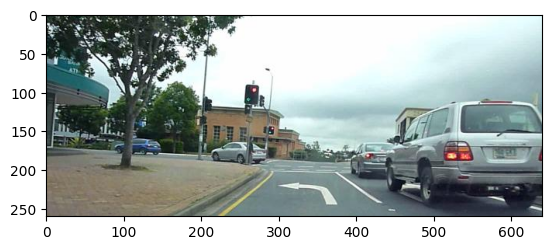

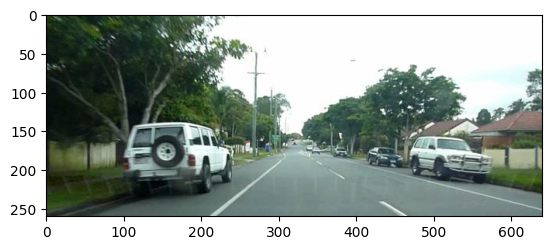

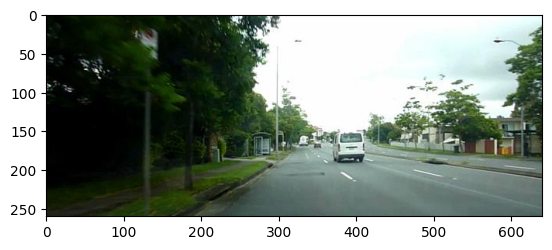

In [51]:
##### Resolva o exercício aqui
import os

# carrega todas as imagens de uma pasta, em ordem alfabética e retorna um array de imagens e outro com os respectivos nomes das imagens
def load_images_from_folder(folder):
    images = []
    names = []
    for filename in sorted(os.listdir(folder)):
        img = cv2.imread(os.path.join(folder,filename))
        if img is not None:
            images.append(img)
            names.append(filename)
    return images, names

def equalizaHistImgBGR(img):
    imgYUV = cv2.cvtColor(img, cv2.COLOR_BGR2YUV)
    imgYUV[:,:,0] = cv2.equalizeHist(imgYUV[:,:,0])
    return cv2.cvtColor(imgYUV, cv2.COLOR_YUV2BGR)

    # Testes em outros colorspaces

    # imgHSV = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    # imgHSV[:,:,2] = cv2.equalizeHist(imgHSV[:,:,2])
    # return cv2.cvtColor(imgHSV, cv2.COLOR_HSV2BGR)

    # channels = cv2.split(img)
    # eq_channels = []
    # for _, ch in enumerate(channels):
    #     eq_channels.append(cv2.equalizeHist(ch))
    # return cv2.merge(eq_channels)

    # imgYcrcb = cv2.cvtColor(img, cv2.COLOR_BGR2YCrCb)
    # imgYcrcb[:, :, 0] = cv2.equalizeHist(imgYcrcb[:, :, 0])
    # return cv2.cvtColor(imgYcrcb, cv2.COLOR_YCrCb2BGR)

    # imgLab = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
    # imgLab[:,:,0] = cv2.equalizeHist(imgLab[:,:,0])
    # return cv2.cvtColor(imgLab, cv2.COLOR_LAB2BGR)

def escurecerImgPorSubtracao(img):
    new_img = np.zeros(img.shape, img.dtype)
    beta = 80
    for y in range(img.shape[0]):
        for x in range(img.shape[1]):
            for c in range(img.shape[2]):
                new_img[y,x,c] = np.clip(img[y,x,c] - beta, 0, 255)
    return new_img

def escurecerImgPorMultiplicacao(img):
    new_img = np.zeros(img.shape, img.dtype)
    alpha = 0.5
    for y in range(img.shape[0]):
        for x in range(img.shape[1]):
            for c in range(img.shape[2]):
                new_img[y,x,c] = np.clip(alpha*img[y,x,c], 0, 255)
    return new_img

def separar(dirpath1, dirpath2):
    path1 = os.path.join(dirpath2, 'ex08_claro')
    path2 = os.path.join(dirpath2, 'ex08_escuro')
    
    if not os.path.exists(path1):
        os.mkdir(path1)
    if not os.path.exists(path2):
        os.mkdir(path2)

    imgs, names = load_images_from_folder(dirpath1)


    for i, img in enumerate(imgs):
        imgGray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        # se img for escura:
            # equaliza seu histograma
            # salva a imagem equalizada na pasta ex8_escuro
        if np.mean(imgGray) < 80:
            imgEqualizadaBGR = equalizaHistImgBGR(img)
            cv2.imwrite(os.path.join('./figsResultado/ex08_escuro', names[i]), imgEqualizadaBGR)
            
        
        # se img for clara:
            # criar 2 novas imagens escurecidas
            # criar imagem escurecida por subtração
            # criar imagem escurecida por multiplicação
            # fazer a equalização das duas imagens escurecidas
            # salvar as duas imagens escurecidas e as duas equalizadas na pasta ex08_claro
        else:
            plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
            plt.show()
        
            img1 = escurecerImgPorSubtracao(img)
            img2 = escurecerImgPorMultiplicacao(img)

            img1Equalizada = equalizaHistImgBGR(img1)
            img2Equalizada = equalizaHistImgBGR(img2)


            imgClaroPath = './figsResultado/ex08_claro'

            imgName = names[i].split('.')
            img1Path = os.path.join(imgClaroPath, f'{imgName[0]}_Sub.jpg')
            img2Path = os.path.join(imgClaroPath, f'{imgName[0]}_Mul.jpg')
            img1EqPath = os.path.join(imgClaroPath, f'{imgName[0]}_SubEq.jpg')
            img2EqPath = os.path.join(imgClaroPath, f'{imgName[0]}_MulEq.jpg')

            cv2.imwrite(img1Path, img1)
            cv2.imwrite(img2Path, img2)
            cv2.imwrite(img1EqPath, img1Equalizada)
            cv2.imwrite(img2EqPath, img2Equalizada)


        

separar('./figs/estrada', './figsResultado')
